<a href="https://colab.research.google.com/github/Sindhusridasari/AI/blob/main/Assignment_4(linear_regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Statement: Estimate the bicarbonates of well water based on its pH value using simple regression model. Consider SGD optimizer.

Do the manual calculation for one iteration by taking only first two samples in the dataset
Write the python code to build simple linear regression model using SGD optimizer
Do the data normalization
Split the data for train and test (90:10)
Train the simple linear regression model using SGD with training data
Compute MSE, RMSE and MAE with training data
Compute MSE, RMSE and MAE with testing data

Manual calculations

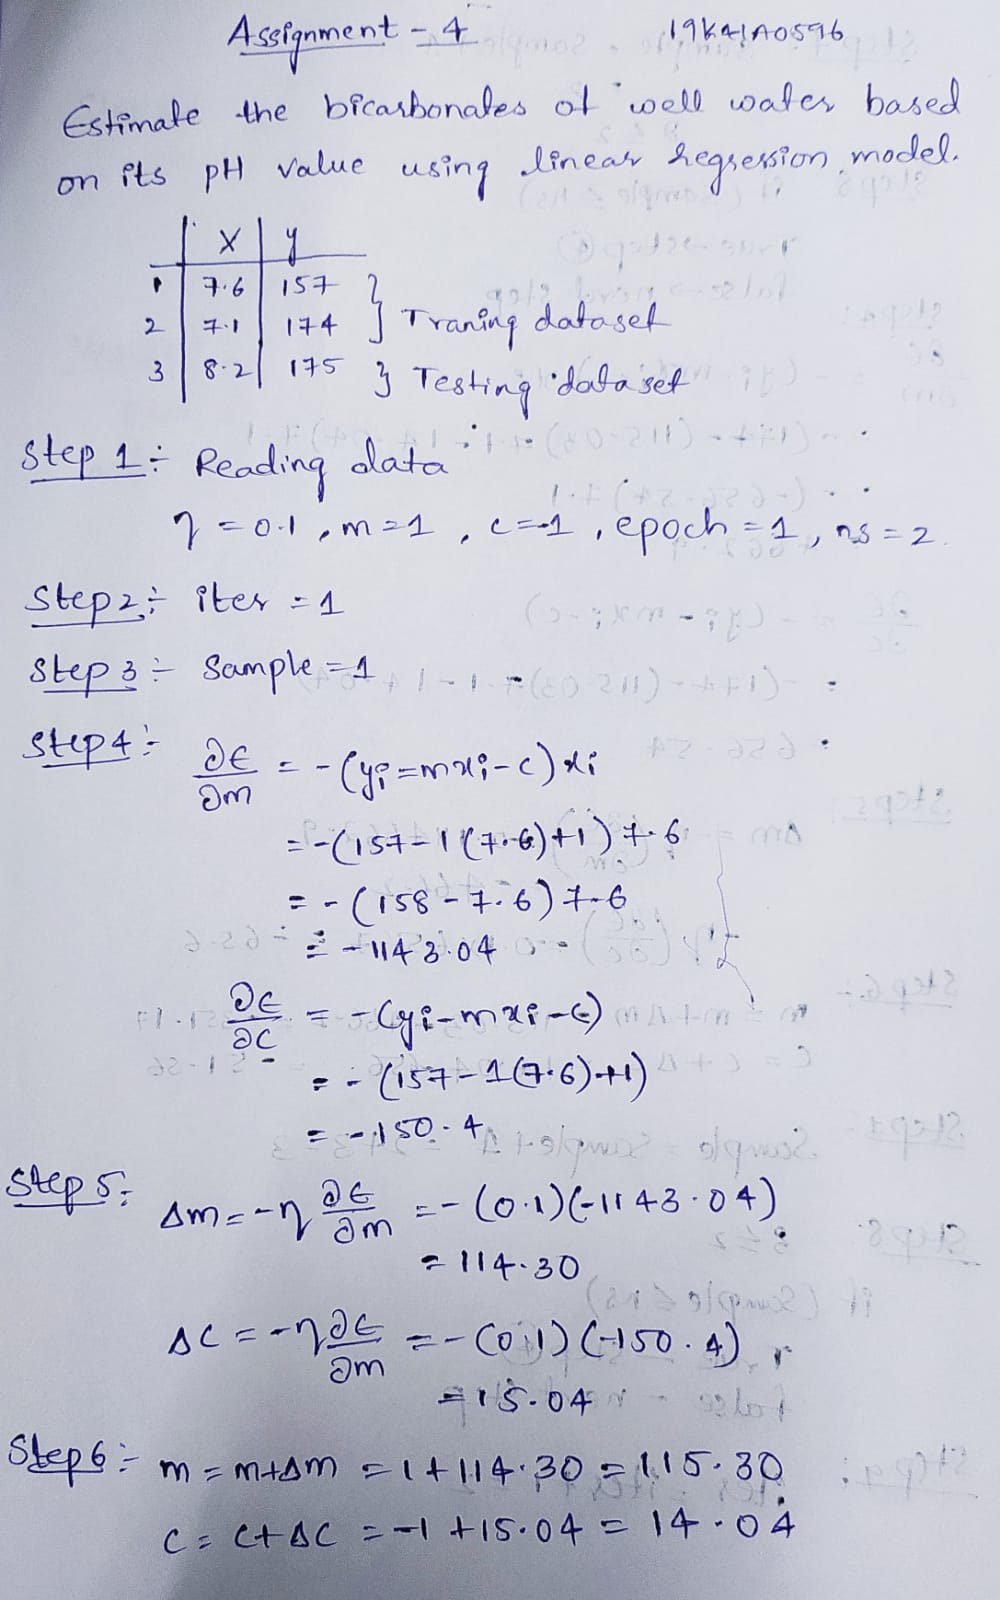

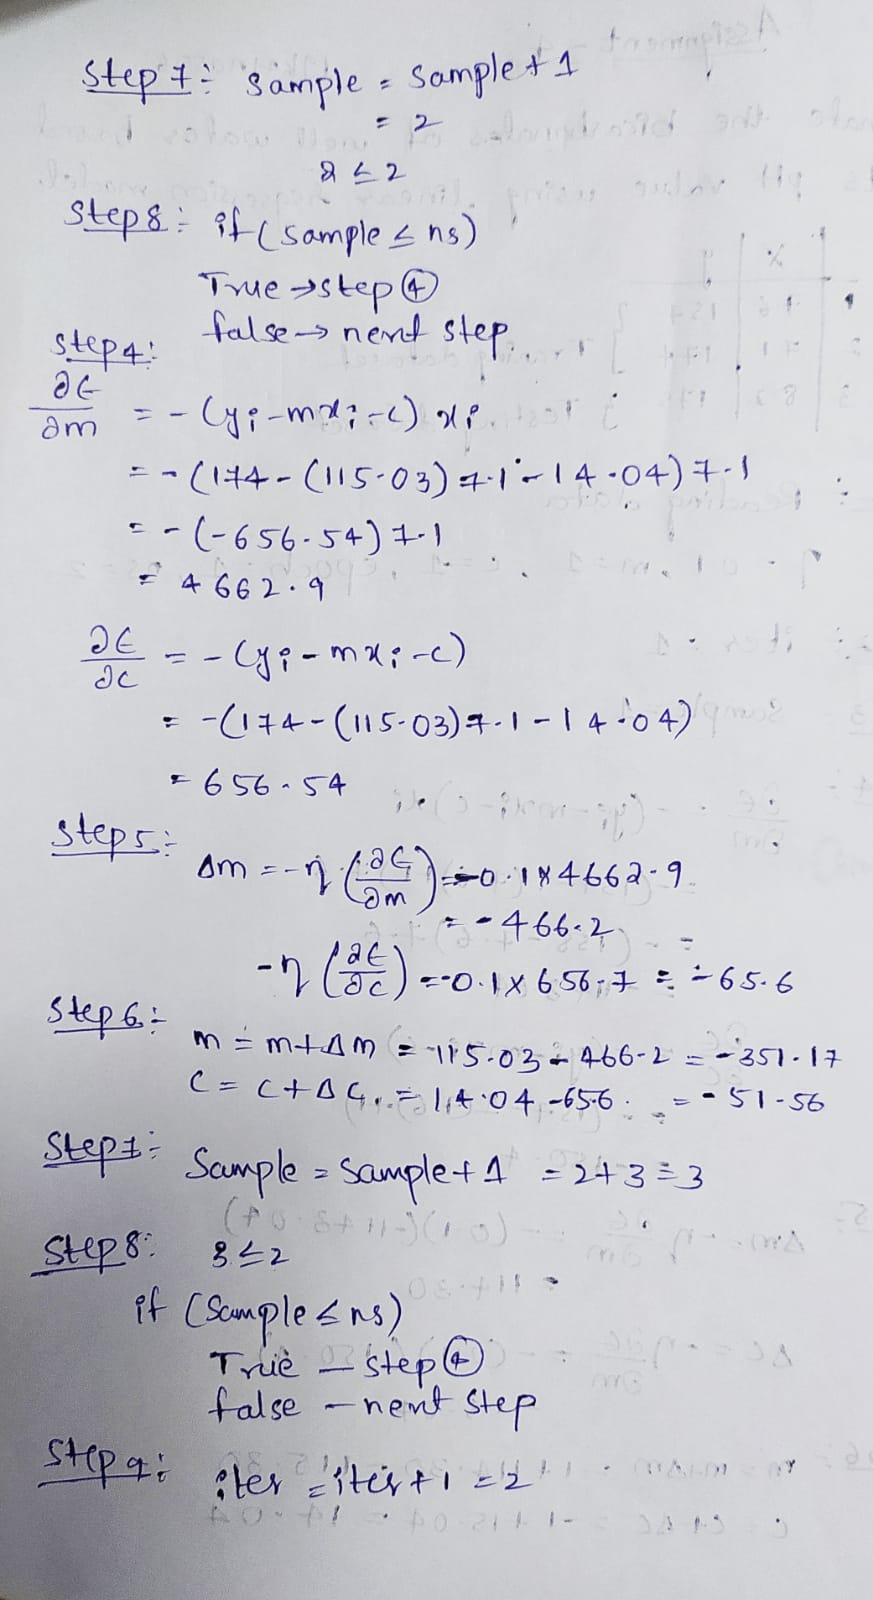

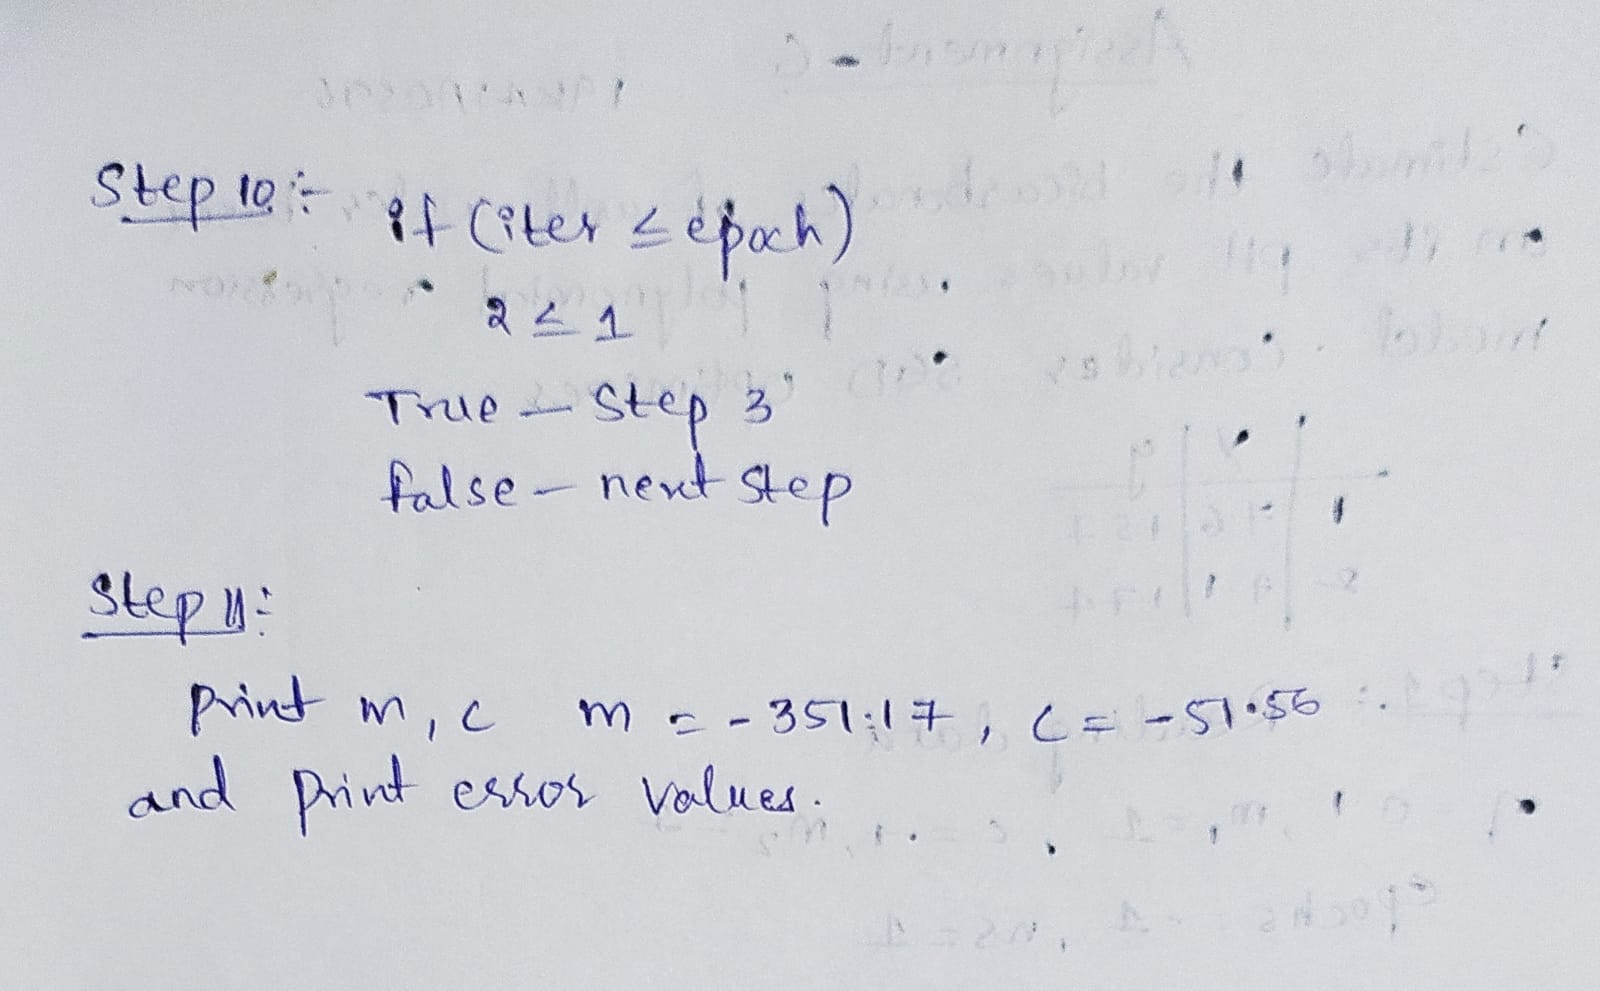

Python code

Mount google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import Libraries


In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

Load data

In [ ]:
data = pd.read_excel('/content/slr09.xls')
data.head()

*** No CODEPAGE record, no encoding_override: will use 'ascii'


,X,Y
0,7.6,157
1,7.1,174
2,8.2,175
3,7.5,188
4,7.4,171


Outliers Treatment

In [ ]:
outliers = []
def detect_outliers_zscore(data):
  thres = 3
  mean = np.mean(data)
  std = np.std(data)
  for i in data:
    z_score = (i - mean)/std
    if(np.abs(z_score) > thres):
      outliers.append(i)
  return outliers

In [ ]:
sample_outliers_X = detect_outliers_zscore(data['X'])
sample_outliers_Y = detect_outliers_zscore(data['Y'])
print("Outliers in X column from Z-scores method: ", sample_outliers_X)
print("Outliers in Y column from Z-scores method: ", sample_outliers_Y)

Outliers in X column from Z-scores method:  []
Outliers in Y column from Z-scores method:  []


Missing values treatment

In [ ]:
print(data.isnull().sum())

X    0
Y    0
dtype: int64


In [ ]:
m1=data['X'].mean()
m2=data['Y'].mean()
data['X'].fillna(value=m1, inplace=True)
data['Y'].fillna(value=m2, inplace=True)

Minimum and maximum values

In [ ]:
x_min = data['X'].min()
x_max = data['X'].max()
y_min = data['Y'].min() 
y_max = data['Y'].max()
print(x_min, x_max, y_min, y_max) 

6.7 8.8 35 262


In [ ]:
Normalisation

In [ ]:
from sklearn.preprocessing import MinMaxScaler
X1 = np.array(data['X']).reshape(-1,1)
scaler = MinMaxScaler()
scaler.fit(X1)
X_scaled = scaler.transform(X1)
data['X'] = X_scaled.reshape(1,-1)[0]

In [ ]:
Y1 = np.array(data['Y']).reshape(-1,1)
scaler = MinMaxScaler()
scaler.fit(Y1)
Y_scaled = scaler.transform(Y1)
data['Y'] = Y_scaled.reshape(1,-1)[0]

In [ ]:
Data split

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.X, data.Y, test_size = 0.10, random_state = 10)

Initialisation

In [ ]:
m = random.uniform(-10, 10)
c = random.uniform(-10, 10)
eta = 0.9
epochs = 2000

Gradient Calculation

In [ ]:
def gradient(m, c, x, y):
  m_deriv = -1*(y - m*x -c)*x;
  c_deriv = -1*(y - m*x - c)
  return m_deriv, c_deriv

Training the model

In [25]:
for iter in range(epochs):
  for sample in range(x_train.shape[0]):
    der_m, der_c = gradient(m, c, x_train.iloc[sample], y_train.iloc[sample])
    m = m - eta*der_m
    c = c - eta*der_c

print('Model Parameters are ', m, c)

Model Parameters are  -0.24265760666929886 0.7891381221272105


Model Prediction on training Data

In [ ]:
y_pred_train = []
for i in x_train:
  y_p_tr = (m*i) + c
  y_pred_train.append(y_p_tr)
y_pred_train = np.array(y_pred_train)
print(y_pred_train)

[0.66203176 0.69669713 0.71980738 0.71980738 0.58114589 0.66203176
 0.74291763 0.54648052 0.61581126 0.685142   0.71980738 0.75447275
 0.74291763 0.65047663 0.59270101 0.70825225 0.62736638 0.62736638
 0.78913812 0.71980738 0.74291763 0.66203176 0.58114589 0.67358688
 0.71980738 0.70825225 0.74291763 0.685142   0.63892151 0.69669713]


Model Prediction on Testing Data

In [ ]:
y_pred_test = []
for i in x_test:
  y_pr_te = (m*i) + c
  y_pred_test.append(y_pr_te)
y_pred_test = np.array(y_pred_test)
print(y_pred_test)

[0.7313625  0.65047663 0.61581126 0.63892151]


Error Metrics Calculation

In [ ]:
import math
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error

# Training Accuracy
rmse = math.sqrt(mean_squared_error(y_train, y_pred_train)) 
print('Root mean square error', rmse)
mse = (mean_squared_error(y_train, y_pred_train)) 
print('Mean square error', mse)
mae=mean_absolute_error(y_train, y_pred_train)
print('Mean absolute error', mae)

Root mean square error 0.30385884356173964
Mean square error 0.09233019681067778
Mean absolute error 0.2477340006610274


In [ ]:
#Testing Accuracies
mse = math.sqrt(mean_squared_error(y_test, y_pred_test)) 
print('Root mean square error', mse) 
mse = (mean_squared_error(y_test, y_pred_test)) 
print('Mean square error', mse) 
mae=mean_absolute_error(y_test, y_pred_test)
print('Mean absolute error', mae)

Root mean square error 0.32325027367815695
Mean square error 0.10449073943300338
Mean absolute error 0.22891315522620306


Deployment


In [ ]:
X=float(input('Enter PH value of well water'))
print('X=',X)

x_nor = (X - x_min)/(x_max - x_min)
y_nor = m*x_nor + c

Y = y_nor*(y_max - y_min) + y_min 
print('Bi-carbonates = ',Y)

Enter PH value of well water8.1
X= 8.1
Bi-carbonates =  177.4121692469229


Thank you!